# Ujian Tengah Semester 2
## Timeseries Forecasting LSTM
## ================================
### Nama : Paul Wijaya Verda Kusuma
### NIM  : 215314051

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from statsmodels.tsa.arima.model import ARIMA

In [2]:
# ==========================================
# 1. Load Dataset hasil preprocessing
# ==========================================
df = pd.read_csv('usd_idr_preprocessed.csv', parse_dates=['Date'], index_col='Date')
# Cek beberapa baris awal
print(df.head())

                   Close
Date                    
2020-01-02  13689.231445
2020-01-03  13884.786133
2020-01-04  13884.786133
2020-01-05  13884.786133
2020-01-06  13934.316406


In [3]:
# Ambil kolom 'Close' dan ubah jadi array 2D
data = df['Close'].values.reshape(-1, 1)

In [4]:
# ==========================================
# 2. Normalisasi agar cocok untuk input LSTM
# ==========================================
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [5]:
# ==========================================
# 3. Split data training dan testing
# (misal 30 hari terakhir sebagai testing)
# ==========================================
train_size = len(data_scaled) - 30
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [6]:
# ==========================================
# 4. Fungsi Sliding Window
# Digunakan untuk membuat data time series
# ==========================================
def create_dataset(dataset, window_size=10):
    X, y = [], []
    for i in range(len(dataset) - window_size):
        X.append(dataset[i:i+window_size])
        y.append(dataset[i+window_size])
    return np.array(X), np.array(y)

# Tentukan panjang window (timesteps)
window_size = 20

X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

In [7]:
# ==========================================
# 5. Ubah bentuk data ke 3D (samples, timesteps, features)
# ==========================================
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [8]:
# ==========================================
# 6. Buat Model LSTM
# ==========================================
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training model LSTM
history = model.fit(X_train, y_train, epochs=50, verbose=1)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1551
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0033
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016     
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014     
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017 
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014     
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015     
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016 
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012    
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011     
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012     
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9m

In [9]:
# ==========================================
# 7. Prediksi & visualisasi hasil LSTM
# ==========================================
predicted = model.predict(X_test)

# Invers kembali skala untuk interpretasi
predicted_rescaled = scaler.inverse_transform(predicted)
actual_rescaled = scaler.inverse_transform(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


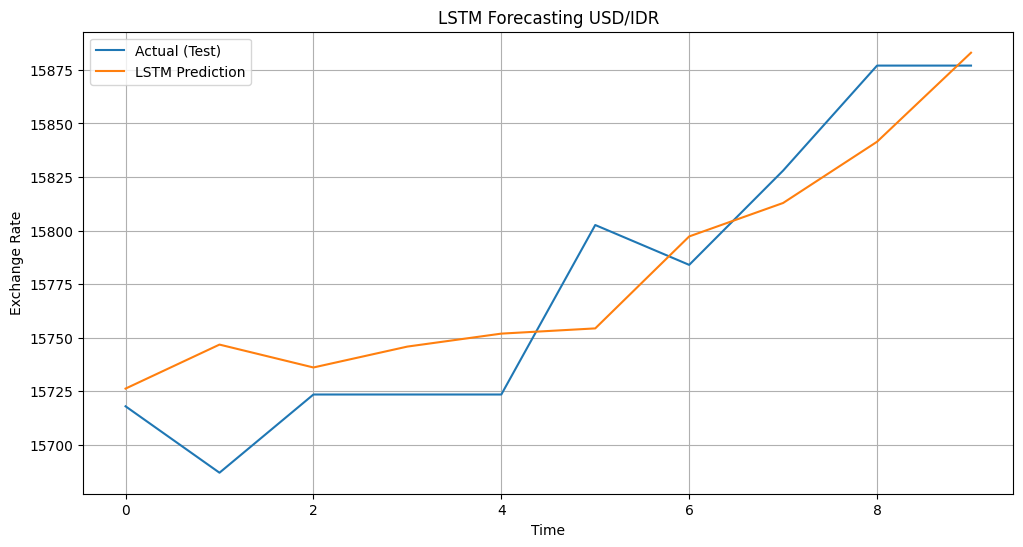

In [10]:
# Plot hasil prediksi vs aktual
plt.figure(figsize=(12, 6))
plt.plot(actual_rescaled, label='Actual (Test)')
plt.plot(predicted_rescaled, label='LSTM Prediction')
plt.title('LSTM Forecasting USD/IDR')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# ==========================================
# 8. Evaluasi hasil LSTM
# ==========================================
mse_lstm = mean_squared_error(actual_rescaled, predicted_rescaled)
mae_lstm = mean_absolute_error(actual_rescaled, predicted_rescaled)

print(f"[LSTM] Mean Squared Error: {mse_lstm}")
print(f"[LSTM] Mean Absolute Error: {mae_lstm}")

[LSTM] Mean Squared Error: 914.1227175712456
[LSTM] Mean Absolute Error: 24.962207031249456


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


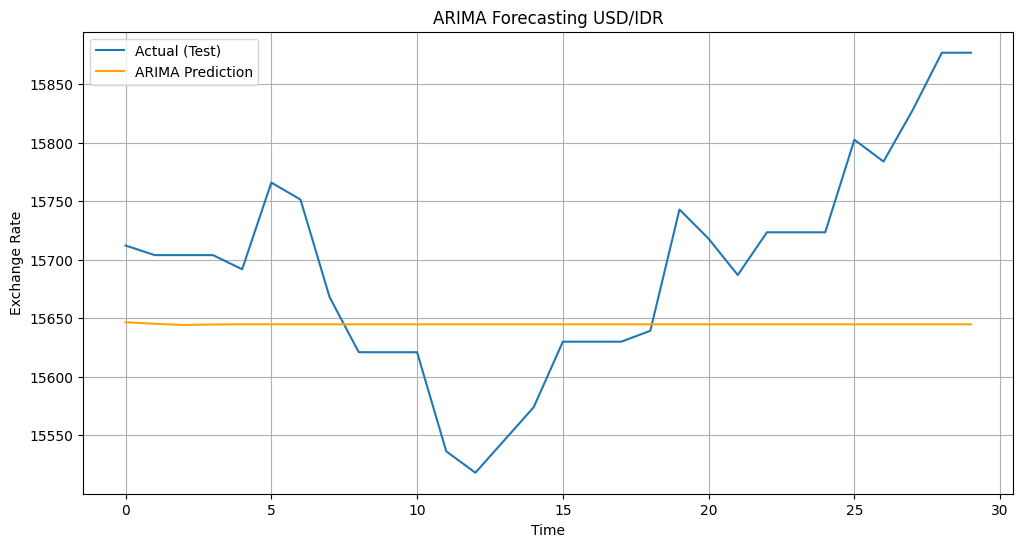

[ARIMA] Mean Squared Error: 10320.17815833387
[ARIMA] Mean Absolute Error: 82.05950271913073


In [12]:
# ==========================================
# 9. Buat Model ARIMA
# Gunakan data tanpa scaling (karena ARIMA tidak butuh normalisasi)
# ==========================================
# Pakai seluruh data kecuali 30 terakhir untuk training
train_arima = df['Close'][:-30]
test_arima = df['Close'][-30:]

# Tentukan model ARIMA (p,d,q) - kamu bisa ubah nilai ini dari hasil AIC / percobaan
model_arima = ARIMA(train_arima, order=(5,1,0))
fitted_arima = model_arima.fit()

# Forecast 30 langkah ke depan
forecast_arima = fitted_arima.forecast(steps=30)

# Plot hasil ARIMA
plt.figure(figsize=(12, 6))
plt.plot(test_arima.values, label='Actual (Test)')
plt.plot(forecast_arima.values, label='ARIMA Prediction', color='orange')
plt.title('ARIMA Forecasting USD/IDR')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi ARIMA
mse_arima = mean_squared_error(test_arima.values, forecast_arima.values)
mae_arima = mean_absolute_error(test_arima.values, forecast_arima.values)

print(f"[ARIMA] Mean Squared Error: {mse_arima}")
print(f"[ARIMA] Mean Absolute Error: {mae_arima}")

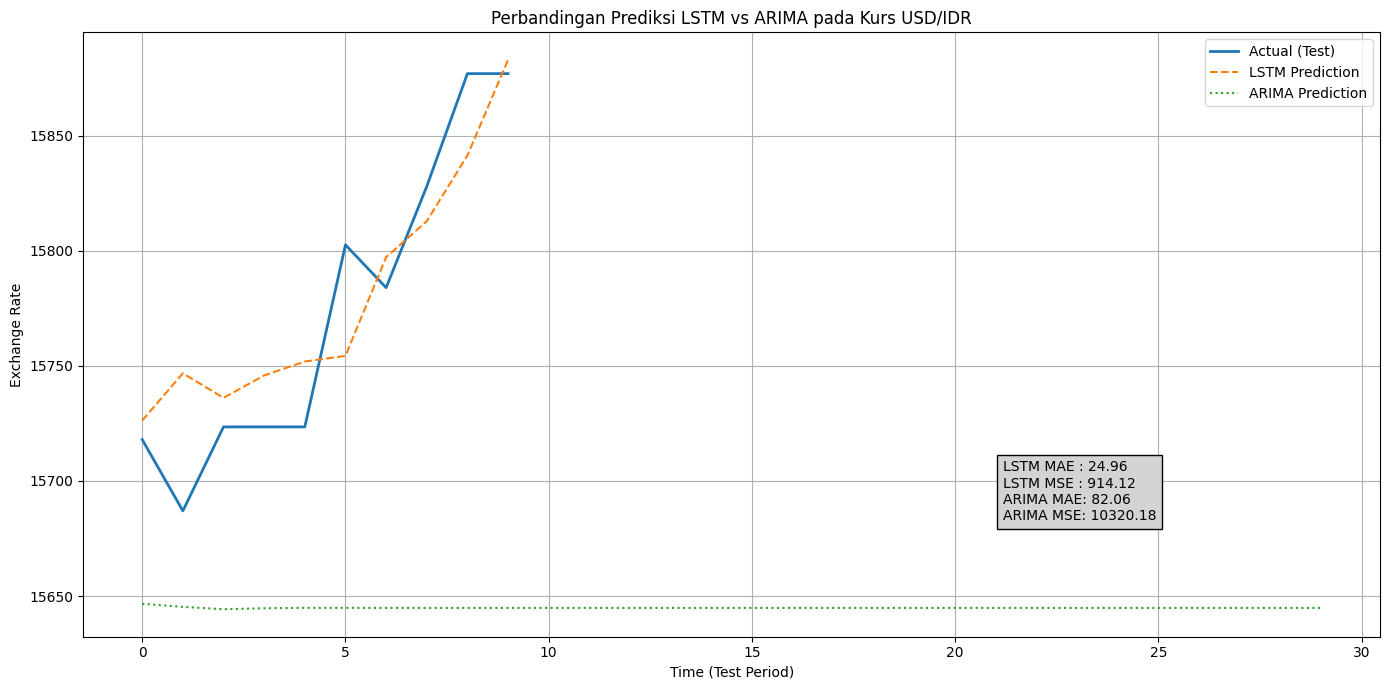

In [13]:
# ==========================================
# 10. Perbandingan Akhir & Kesimpulan
# ==========================================
# Plot gabungan
plt.figure(figsize=(14, 7))
plt.plot(actual_rescaled, label='Actual (Test)', linewidth=2)
plt.plot(predicted_rescaled, label='LSTM Prediction', linestyle='--')
plt.plot(forecast_arima.values, label='ARIMA Prediction', linestyle=':')
plt.title('Perbandingan Prediksi LSTM vs ARIMA pada Kurs USD/IDR')
plt.xlabel('Time (Test Period)')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)

# Tampilkan metrik evaluasi di plot
textstr = '\n'.join((
    f"LSTM MAE : {mae_lstm:.2f}",
    f"LSTM MSE : {mse_lstm:.2f}",
    f"ARIMA MAE: {mae_arima:.2f}",
    f"ARIMA MSE: {mse_arima:.2f}"
))

plt.gcf().text(0.72, 0.25, textstr, fontsize=10,
               bbox=dict(facecolor='lightgray', edgecolor='black'))

plt.tight_layout()
plt.show()

# KESIMPULAN

Dua metode time series forecasting yaitu LSTM (Long Short-Term Memory) dan ARIMA (Autoregressive Integrated Moving Average) telah digunakan untuk memprediksi nilai tukar USD/IDR.

Hasil evaluasi menunjukkan bahwa:
### LSTM memiliki MAE sebesar ~24.96 dan MSE sebesar ~914.12.
### ARIMA memiliki MAE sebesar ~82.06 dan MSE sebesar ~10320.18.

Model LSTM menunjukkan performa yang lebih baik secara signifikan dibandingkan ARIMA dalam memprediksi nilai tukar USD/IDR.
MAE yang lebih rendah menunjukkan bahwa rata-rata kesalahan prediksi LSTM lebih kecil, sedangkan MSE yang jauh lebih rendah menandakan LSTM lebih tahan terhadap error besar atau outlier.

Ini membuktikan bahwa LSTM lebih unggul dalam menangkap pola non-linear dan fluktuasi kompleks pada data keuangan seperti kurs mata uang.
Di sisi lain, ARIMA lebih sederhana dan cepat dilatih, namun cenderung kurang akurat untuk dataset dengan pola yang tidak linear.